# Calculate accuracy of last part 
*  using symbol reflected emotion of last part, Culcurate if generated sentence is adequately 
* dataset used to train model  ...
   - all domain
   - over sampling all domain

* I want to know ... 
  - whether can the model learn emotional features in sentences using emotional label?
  - whetehr should we use over sampling ?

In [11]:
import re

In [73]:
id2kao = {"0":"","1":"(・_・)","2":"(怒)","3":"(悲)",
          "4":"(喜)","5":"(安心)"}
id2emo = {"0":"NONE","1":"neutral","2":"anger","3":"sad",
          "4":"happy","5":"contentment"}

In [70]:
def kao_calc_acc(file_path,target_kao):
    output_file = open(file_path + '.txt', 'r')
    uttrs = output_file.readlines()
    acc = 0
    for i, uttr in enumerate(uttrs,1):
        uttr = uttr.strip()
        if uttr[-1] == ")":
            for j in range(50):
                if uttr[-j] == "(":
                    last_part = uttr[-j:]
                    break
        else:
            last_part = ""
        if last_part == target_kao:
            acc += 1
    acc = acc / i
    return acc

def print_acc(output_dir):
    print("directry name : ", output_dir)
    print("Calcurate accuracy of last_part ...")
    for i in range(6):
        accuracy = kao_calc_acc(output_dir+"/"+id2emo[str(i)], id2kao[str(i)])
        print(" {} {}: {}".format(id2emo[str(i)],id2kao[str(i)],accuracy))

In [71]:
output_dir1 = "../emotion_dialogue_model/output/output_tw21_allkao_24"
output_dir2 = "../emotion_dialogue_model/output/output_tw21_overallkao_19"

print_acc(output_dir1)
print_acc(output_dir2)

directry name :  ../emotion_dialogue_model/output/output_tw21_allkao_24
Calcurate accuracy of last_part ...
 NONE : 0.0
 neutral (・_・): 0.9979695431472081
 anger (怒): 0.9979695431472081
 sad (悲): 0.7644670050761422
 happy (喜): 0.9593908629441624
 contentment (安心): 0.0
directry name :  ../emotion_dialogue_model/output/output_tw21_overallkao_19
Calcurate accuracy of last_part ...
 NONE : 0.0010152284263959391
 neutral (・_・): 0.9685279187817258
 anger (怒): 0.9736040609137055
 sad (悲): 0.7685279187817259
 happy (喜): 0.9695431472081218
 contentment (安心): 0.868020304568528


# Calcurate if diversity of sentences
* Confirm how different generated sentences are.
* dataset used to train model ... 
    - over sampling all model using feature of last part
    - over sampling all model 
* prototype = "neutral"

In [100]:
id2emo = {"0":"NONE","1":"neutral","2":"anger","3":"sad",
          "4":"happy","5":"contentment","6":"all"}
proto_emotion = "neutral"
compare_emotion = ["NONE","anger","sad","happy","contentment"]

In [95]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [169]:
def diversity_rate(file_path, use_lastpart = True):
    pro_file = open("{}/{}.txt".format(file_path,proto_emotion), 'r')
    uttrs1 = pro_file.readlines()
    num_uttr = len(uttrs1)
    com_file_list = [open("{}/{}.txt".format(file_path,e), 'r')
                     for e in compare_emotion]
    uttrs2_list = [uttrs.readlines() for uttrs in com_file_list]
    acc = 0
    using_last_part = 0
    how_diff = []
    num_diff = [0] * len(compare_emotion)
    for i1, uttr1 in enumerate(uttrs1,0):
        uttr1 = uttr1.strip()
        if use_lastpart:
            if re.match("[)）]",uttr1[-1]):
                for j in range(2,len(uttr1)):
                    if re.match("[(（)]",uttr1[-j]):
                        using_last_part += 1
                        uttr1 = uttr1[:-j]
                        break
        for i2 in range(len(compare_emotion)):
            uttr2 = uttrs2_list[i2][i1].strip()
            #print("former - > ", uttr2)
            if use_lastpart:
                if re.match("[)）]",uttr2[-1]):
                    for j in range(2,len(uttr2)):
                        if re.match("[(（)]",uttr2[-j]):
                            using_last_part += 1
                            uttr2 = uttr2[:-j]
                            #print("after - > ",uttr2)
                            break
            
            if uttr1 != uttr2:
                num_diff[i2] += 1
        #print("number_of_lastpart : ",using_last_part)
    [how_diff.append(num_diff[i]/len(uttrs1)) for i in range(len(compare_emotion))]
    how_diff.append(sum(num_diff[1:])/((len(uttrs1)-1)*len(compare_emotion)))
    return num_uttr, how_diff

def print_how_diff(file_path):
    print("\nOutput file name : ", file_path)
    num_uttr, how_diff = diversity_rate(file_path)
    print("  Number of uttrances : ",num_uttr)
    print_emotion = compare_emotion + ["average"]
    print(print_emotion)
    for i, d in enumerate(how_diff):
        print("{} : {:.6f} ({} uttrances)".format(print_emotion[i], d, int(d*num_uttr)))
        x = np.array([1-d, d])
        x_label = ["same","different"]
        plt.pie(x,labels=x_label,counterclock=False, startangle=90, 
                                autopct="%.1f%%",pctdistance=0.7) 
        plt.axis('equal')
        plt.rcParams["font.size"] = 18
        plt.show()
    fig, ax = plt.subplots()
    x = print_emotion
    #np.arange(0,len(print_emotion),1)
    y = how_diff
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=25, fontsize=10)
    plt.grid()
    plt.ylim(0,1)
    plt.bar(x,y)
    print("Average of sentences is ", how_diff[-1])

In [170]:
compare_emotion

['NONE', 'anger', 'sad', 'happy', 'contentment']

### over sampled all domain


Output file name :  ../emotion_dialogue_model/output/output_tw21_overall_16
  Number of uttrances :  985
['NONE', 'anger', 'sad', 'happy', 'contentment', 'average']
NONE : 0.454822 (448 uttrances)


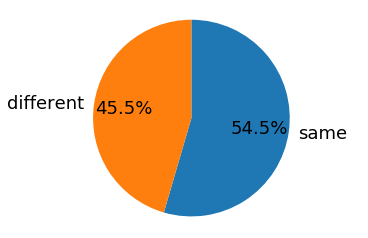

anger : 0.702538 (692 uttrances)


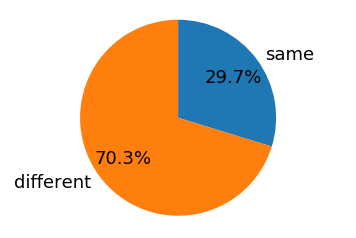

sad : 0.494416 (487 uttrances)


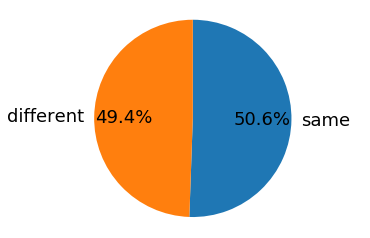

happy : 0.610152 (601 uttrances)


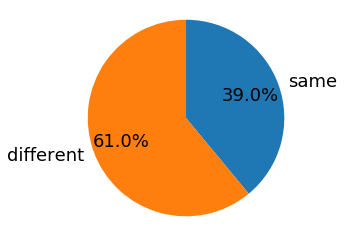

contentment : 0.478173 (471 uttrances)


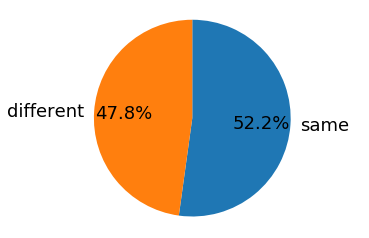

average : 0.457520 (450 uttrances)


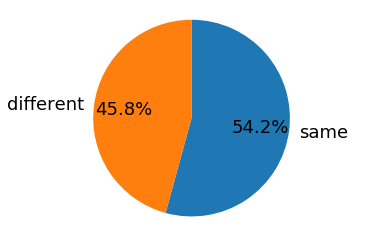

Average of sentences is  0.45752032520325203


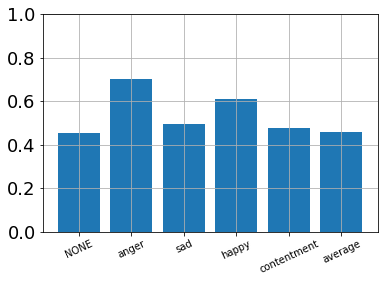

In [171]:
output_dir3 = "../emotion_dialogue_model/output/output_tw21_overall_16"
print_how_diff(output_dir3)

### over sampled all domain with kao


Output file name :  ../emotion_dialogue_model/output/output_tw21_overallkao_19
  Number of uttrances :  985
['NONE', 'anger', 'sad', 'happy', 'contentment', 'average']
NONE : 0.631472 (622 uttrances)


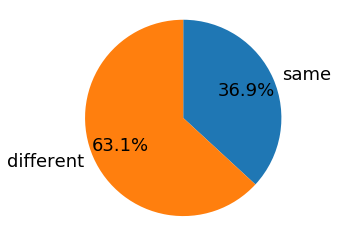

anger : 0.791878 (780 uttrances)


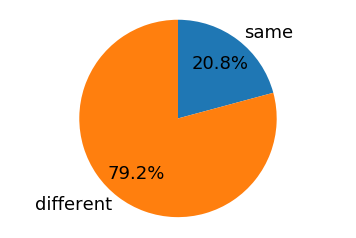

sad : 0.610152 (601 uttrances)


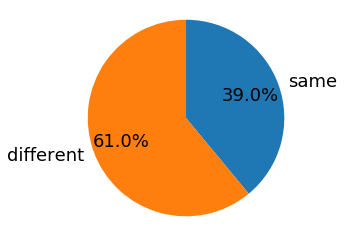

happy : 0.734010 (723 uttrances)


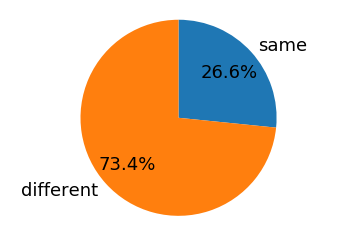

contentment : 0.621320 (612 uttrances)


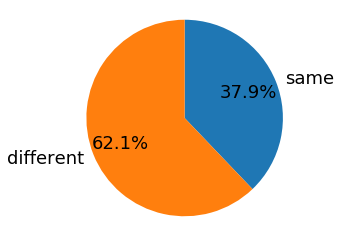

average : 0.552033 (543 uttrances)


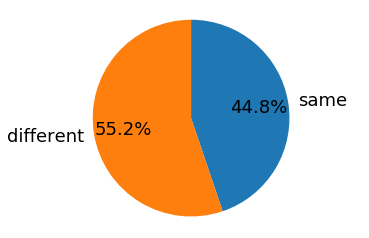

Average of sentences is  0.5520325203252032


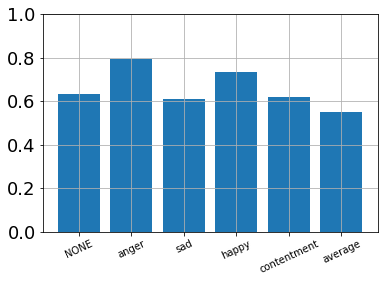

In [172]:
output_dir4 = "../emotion_dialogue_model/output/output_tw21_overallkao_19"
print_how_diff(output_dir4)

### over sampled cleaning only


Output file name :  ../emotion_dialogue_model/output/output_tw21_overclean_25
  Number of uttrances :  985
['NONE', 'anger', 'sad', 'happy', 'contentment', 'average']
NONE : 0.186802 (184 uttrances)


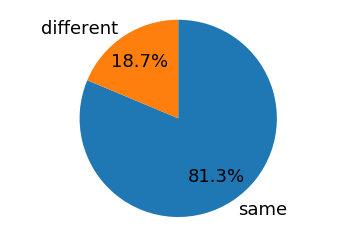

anger : 0.307614 (303 uttrances)


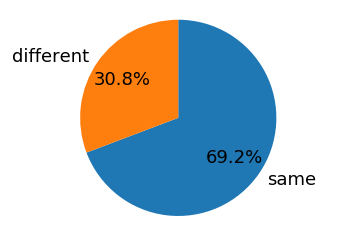

sad : 0.222335 (219 uttrances)


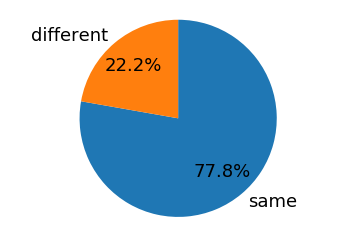

happy : 0.289340 (285 uttrances)


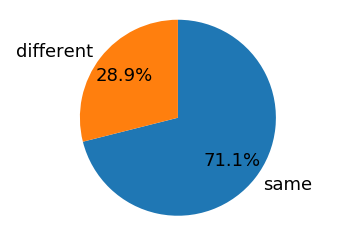

contentment : 0.237563 (234 uttrances)


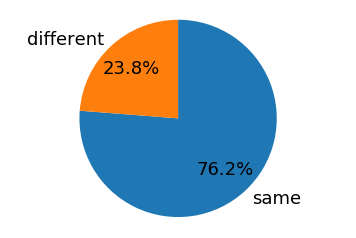

average : 0.211585 (208 uttrances)


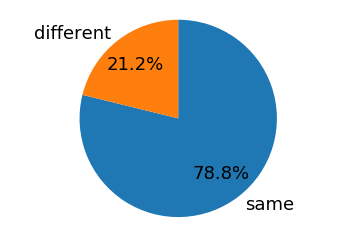

Average of sentences is  0.21158536585365853


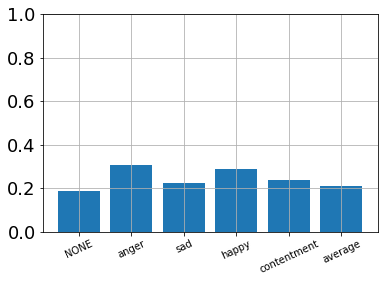

In [173]:
output_dir5 = "../emotion_dialogue_model/output/output_tw21_overclean_25"
print_how_diff(output_dir5)

### over sampled all domain and over sampled cleaning


Output file name :  ../emotion_dialogue_model/output/output_tw21_overall16_overclean_3
  Number of uttrances :  985
['NONE', 'anger', 'sad', 'happy', 'contentment', 'average']
NONE : 0.338071 (333 uttrances)


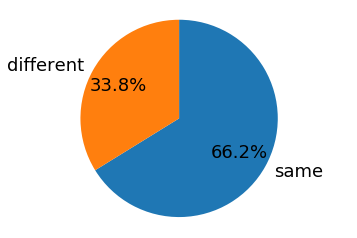

anger : 0.541117 (533 uttrances)


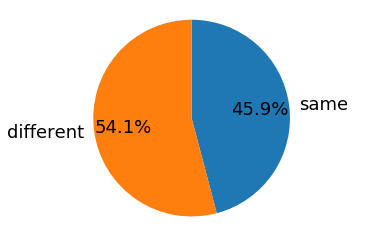

sad : 0.356345 (351 uttrances)


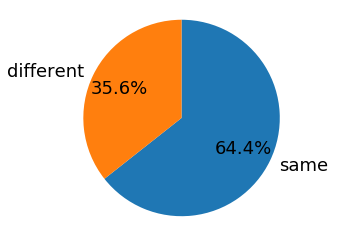

happy : 0.481218 (474 uttrances)


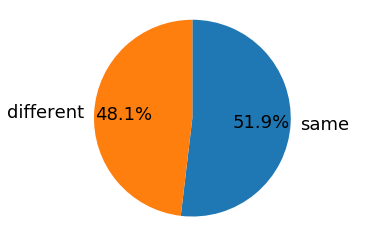

contentment : 0.353299 (348 uttrances)


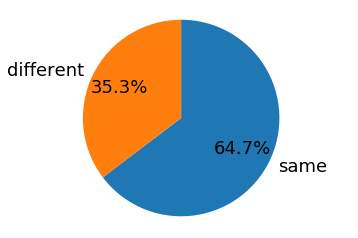

average : 0.346748 (341 uttrances)


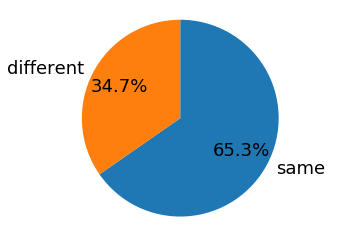

Average of sentences is  0.3467479674796748


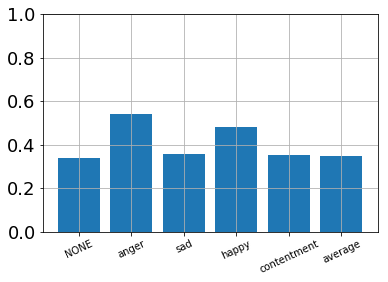

In [174]:
output_dir6 = "../emotion_dialogue_model/output/output_tw21_overall16_overclean_3"
print_how_diff(output_dir6)

### over sampled with kao all and over sampled cleaning with kao


Output file name :  ../emotion_dialogue_model/output/output_tw21_overallkao_overcleankao_3
  Number of uttrances :  985
['NONE', 'anger', 'sad', 'happy', 'contentment', 'average']
NONE : 0.506599 (499 uttrances)


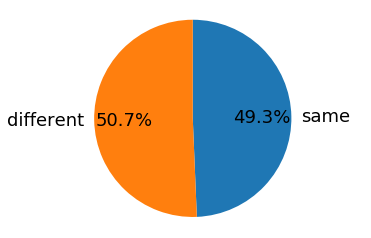

anger : 0.608122 (599 uttrances)


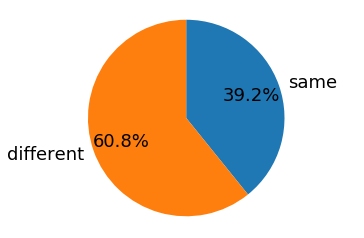

sad : 0.479188 (472 uttrances)


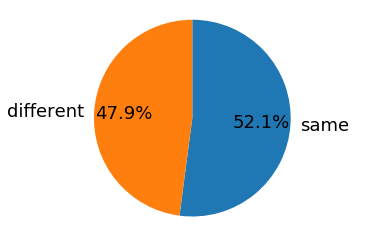

happy : 0.591878 (583 uttrances)


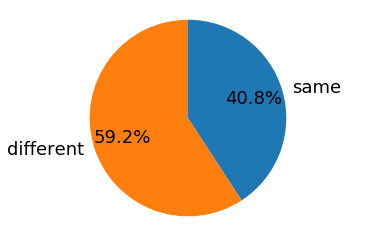

contentment : 0.505584 (498 uttrances)


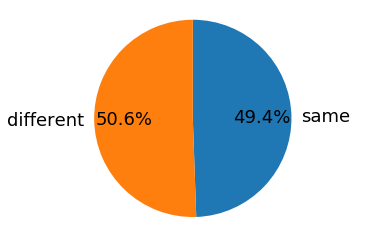

average : 0.437398 (430 uttrances)


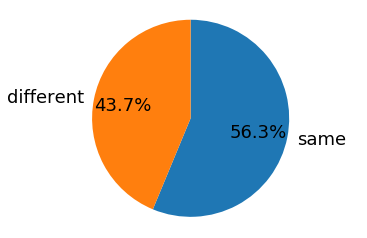

Average of sentences is  0.4373983739837398


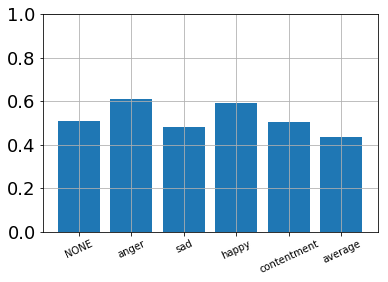

In [176]:
output_dir6 = "../emotion_dialogue_model/output/output_tw21_overallkao_overcleankao_3"
print_how_diff(output_dir6)

In [9]:
pro_file = open("{}/{}.txt".format(output_dir3,compare_emotion[1]), 'r')

In [10]:
pro_file.readlines()[1]

'そんな事言うなよ。\tそんなこと言わずに寝てください!\n'

In [80]:
import torch
a = torch.tensor([[1,2,3],[4,5,6]])
a[:,1]

tensor([2, 5])

In [84]:
for i in a[:,1]:
    print(i.item())

2
5


In [99]:
b = [[1,2,3,4],[3,4,5,6]]

In [100]:
torch.tensor(b)

tensor([[1, 2, 3, 4],
        [3, 4, 5, 6]])

# How different depends on emotion of input

In [ ]:
def deffer_sentence(file1, file2):
    f1 = open(file1+".txt", "r")
    f2 = open(file2+".txt", "r")
    sentences1 = f1.readlines()
    sentence2 = f2.readlinnes()